# Application 2D groundwater flow: panta rhei!

Today, we are investigating a classical hydrogeological problem: how does the piezometric head in an observation well react on pumping in an adjacent well? For that purpose, we will develop a model with an spatial extent of 1.000 m x 750 m (cf. *Fig.  1*).

<img src="08-GW_Modell_EN.png" style="width:500px"/> 
**Figure 1**: Geometry and boundary conditions of the groundwater flow model. All values are given in $m$ (not to scale).

Today's **learning objectives** comprise:
-  Implementation of Theis method by means of Python
-  Formulation of groundwater flow equation by means of the FDM approach and the relevant convergence criterion
-  Repetition of applying outer boundary conditions
-  Application of inner boundary conditions (source and sink terms)

**Please use your *validated 2D conductive heat flow model* as starting point**

## Model parameters
-  Storativity $S = 0.0002$
-  Transmissivity $T = 1{,}000\,m^2/day$
-  Simulation time $t = 0.00175\,days$
-  Initial spatial discretisation $\Delta x = \Delta y = 25\,m$
-  Initial piezometric head $h = 20\,m$
-  Pumping rate $Q = 1{,}000\,m^3/day$

## Theis method
The **Theis method** (1935) is being used in hydrogeology to determine the transmissivity $T$ and storativity $S$ of a groundwater aquifer and is relies on a pumping test undertaken at transient (time-dependent) flow. The analytical approach is defined in the following: 


$h_s (r,t) = \frac{Q}{4 \pi \cdot k_f \cdot h_M} \cdot W(u)$

with:

$W(u) = -\gamma -ln(u) + u - \frac{u^2}{2\cdot 2!} + \frac{u^3}{3\cdot 3!} - \frac{u^4}{4\cdot 4!} + \dots$

and

$u = u(r,t) = \frac{r^2 \cdot S}{4 \cdot k_f \cdot h_M \cdot t}$

-  $h_s (r,t)$: Decrease in piezometric head at distance $r$ to the pumping well after time $t$ (m)
-  $\gamma \approx 0.5772$ (Euler-Mascheroni constant)
-  $Q$: Pumping rate in $m^3/s$
-  $k_f$: Hydraulic conductivity (m/s)
-  $h_M$ : Aquifer thickness (m)
-  $S$: Storativity (-)


### Exercises
1. Which boundary conditions do we have to apply at the model boundaries according to Fig. 1? Which boundary conditions are valid at both well elements in the modelling domain?
2. Please implement the analytical Theis method as function in Python and test it in view of the required number of iterations and its general validity (see first cell below).
3. Develop the FDM formulation of the groundwater flow equation with a source\/sink term on a sheet of paper (*Hints: units of each term in the PDE should match*, $S = S_s b$, W is the flow rate per element volume).

    $\begin{align*}
    S_s \frac{\partial h}{\partial t} & = K  \left[ \frac{\partial ^2 h}{\partial x^2} + \frac{\partial  ^2 h}{\partial y^2}  \right] + W \\
    \end{align*}$

4. Copy your source code from Exercise 7 to a new cell in this sheet and revise it to represent the groundwater flow equation taking into account the given model assumptions. Please do not forget to carefully document your code!

    Derivation of FDM formulation of Neumann boundary condition (1D without source/sink term) for a model boundary by means of Taylor series expansion (cf. lecture slides on derivation of conductive heat flow equation):
    
    $\begin{align}
    u_{i+1} & = u_i + \frac{\Delta x^1}{1!} \frac{\partial u}{\partial x} \bigg| _i + \frac{\Delta x^2}{2!} \frac{\partial ^2u}{\partial x^2} \bigg| _i  + \frac{\Delta x^3}{3!} \frac{\partial ^3u}{\partial x^3}  \bigg| _i + \text{higher order terms} \text{ (Equation 1) } \\
    u_{i-1} & = u_i - \frac{\Delta x^1}{1!} \frac{\partial u}{\partial x} \bigg| _i + \frac{\Delta x^2}{2!} \frac{\partial ^2u}{\partial x^2} \bigg| _i  - \frac{\Delta x^3}{3!} \frac{\partial ^3u}{\partial x^3}  \bigg| _i + \text{higher order terms} \text{ (Equation 2) } \\
    \end{align}$
    
    Solve Equations 1 and 2 for $u_{i \pm 1} - u_i$. The Neumann boundary condition without any in- or outflow $-K\frac{\partial h}{\partial x} = 0$ results in $u_{i - 1} - u_i = 0$ and $u_{i + 1} - u_i = 0$ (left and right model boundary, respectively). Adding Equations 1 and 2, and isolating $\frac{\partial ^2u}{\partial x^2} \bigg| _i$ gives us the following equation for the left model boundary (i=0): <br>
    $ \frac{\partial ^2u}{\partial x^2} \bigg| _{i=0} = \frac {u_{i + 1} - u_i}{\Delta x^2} $ <br>
    and this one for the right model boundary (i=N): <br>
    $ \frac{\partial ^2u}{\partial x^2} \bigg| _{i=N} = \frac {u_{i - 1} - u_i}{\Delta x^2}  $
           

5. Validate your FDM model using the aforementioned parameters against your Python implementation of the Theis method.
6. Please add four injection wells at vertical and horizontal distances of $100\,m$ to the production well to your modelling domain. Then, apply an injection rate of $Q = 1{,}000\,m^3/day$ at each injection well and increase the production rate by a factor of four. Visualise the results.

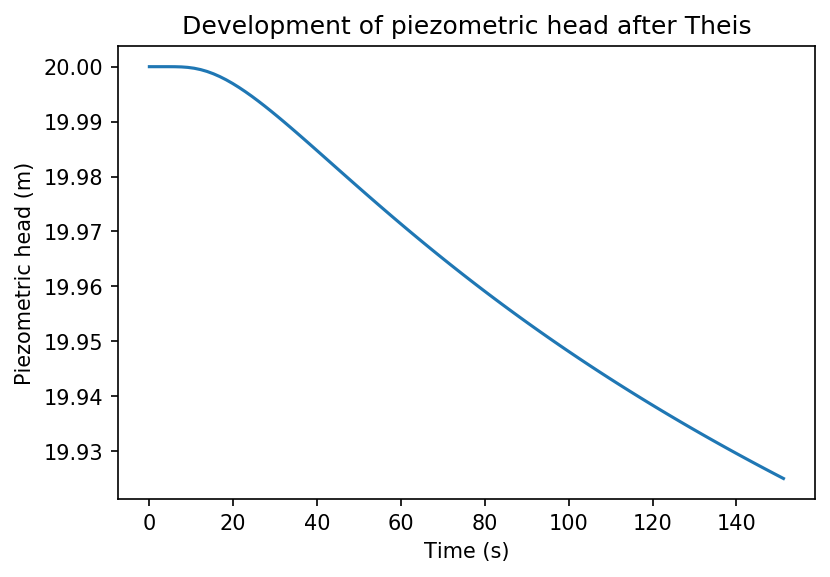

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# Semi-analytical solution of Theis method 

# pi -> numpy.pi
# ! -> numpy.math.factorial()
 
def Theis(r, t, Q, S, T):
    
    '''
    Q: Pumping rate (m^3/s)
    r: Radial distance to production well (m)
    t: Time (s)
    h: Initial piezometric head (m)
    T: Transmissivity of the groundwater aquifer (m^2/s)
    '''
    if t < 1.2:
        return 0
    else:
        u = r**2 * S/(4 * T * t)
        Wu = - 0.5772 - numpy.log(u) + u
    
        for i in range(2,1000):
            Wu_old = Wu
            if i % 2 == 0:
                Wu -= u**i / (i * numpy.math.factorial(i))
            else:
                Wu += u**i / i / numpy.math.factorial(i)
            if Wu_old == Wu:
                #print('iterations', i)
                break

        return Q/(4* numpy.pi * T) * Wu

        
    
Q = 1000/86400
T = 1000/86400 # kf = T / hm
S = 0.0002
h = 20
r = 100
t = 0.00175*86400

t_a = numpy.linspace(0.0,t,100)

h_new = numpy.zeros(len(t_a))
for i, time in enumerate(t_a):
    h_new[i] = Theis(r, time, Q, S, T)
    
fig = pyplot.figure(dpi=150)    
pyplot.plot(t_a,h-h_new)
pyplot.title('Development of piezometric head after Theis');
pyplot.xlabel('Time (s)');
pyplot.ylabel('Piezometric head (m)');
#print('Head at time', t, 's:', h-Theis(r,t,Q,S,T))

dt 2.4000000000000004 nt 63


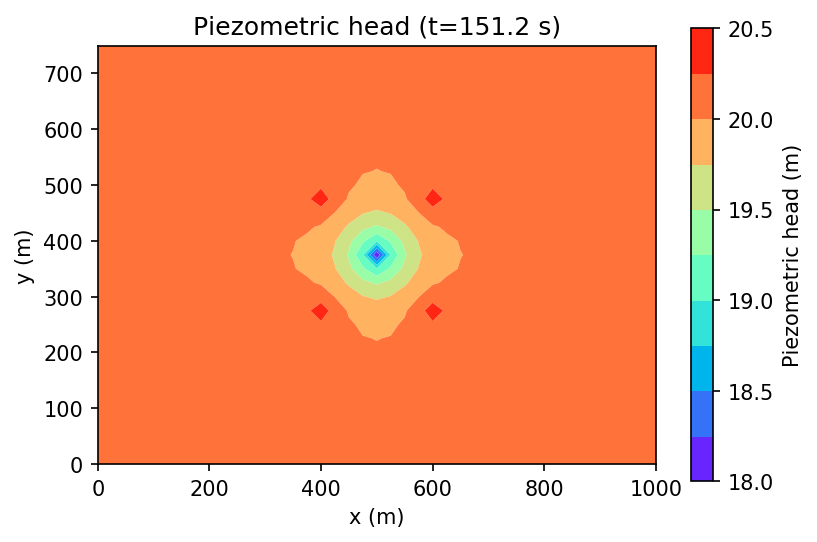

In [4]:
'''
    Numerical solution of groundwater flow equation on finite 2D surface
   
    Parameters:
    lx : Model length in x-direction (m)
    ly : Model length in y-direction (m)
    nx : Number of nodes in x-direction (-)
    ny : Number of nodes in y-direction (-)
    dx : Distance between nodes in x-direction (m)
    dy : Distance between nodes in y-direction (m)
    nt : Number of time steps (-)
    dt : Time step size (s)
    Q  : Pumping rate (m^3/s)
    r  : Radial distance to pumping well (m)
    t  : Time (s)
    hm : Thickness of groundwater aquifer (m)
    T  : Transmissivity of groundwater aquifer (m^2/s)
    alpha: Hydraulic diffusivity (m^2/s)
    t  : Simulation time (s)
    h  : numpy matrix (array) with nx x ny elements of value 0
         Results of time step n+1 (m)
    hn : numpy matrix with results of time step n (m)
    B  : numpy matrix for assignment of bounday conditions (-)
'''

# Load required libraries
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

# Model parametrisation 
lx = 1000             # Model length in x-direction (m)
ly = 750              # Model length in x-direction (m)
nx = 41               # Number of nodes in x-direction (-)
ny = 31               # Number of nodes in y-direction (-)
dx = lx / (nx - 1)    # Distance between nodes in x-direction (m)
dy = ly / (ny - 1)    # Distance between nodes in y-direction (m)
alpha = T/S           # Hydraulic Diffusivity (m^2/s)
h_ini = 20            # Initial piezometric head (m)
t = 0.00175*86400     # Simulation time (s)
#t = 0.1*86400     # Simulation time (s)
dt = 1/(2*alpha*(1/dx**2+1/dy**2))*0.9 # Integer dt calculated based on 
                                       # Neumann convergence criterion
# Time step adaptation (simple scheme)
nt = int(numpy.ceil(t/dt))        
dt = t/nt
print('dt', dt, 'nt', nt) # Print out for verification (can be commented out)

# Initialise matrices for calculation
h = numpy.ones((nx,ny))*h_ini   # numpy matrix (array) with nx x ny elements
                                # of value 
                                # Results for time step (n+1)
hn = numpy.ones((nx,ny))   # numpy matrix with results for time step n

B = numpy.zeros((nx,ny))   # B = 0 : no b.c.
                           # B = 1 : Neumann flow b.c. (production well)
                           # B = 2 : no b.c., marker for observation well
        
# t_n = numpy.zeros((nt+1))                  # Vector to store simulation time for
#                                          # comparison against Theis method
# Numerical = numpy.ones((nt+1))*h_ini            # Numerical piezometric heads
# Analytical = numpy.ones((nt+1))*h_ini           # Analytical piezometric heads

# Initial conditions will be applied by means of analytical solution
# for simulation time t = 0
B[int(nx/2),int(ny/2)] = 1 # Pumping well location (model centre)
                          # well (model centre +
                          # 100 m in x-direction)

# Injection well upper right corner
B[int(nx/2)+int(numpy.round(100/dx,0)),int(ny/2)+int(numpy.round(100/dy,0))] = 2 
# Injection well lower right corner
B[int(nx/2)+int(numpy.round(100/dx,0)),int(ny/2)-int(numpy.round(100/dy,0))] = 2
# Injection well upper left corner
B[int(nx/2)-int(numpy.round(100/dx,0)),int(ny/2)+int(numpy.round(100/dy,0))] = 2 
# Injection well lower left corner
B[int(nx/2)-int(numpy.round(100/dx,0)),int(ny/2)-int(numpy.round(100/dy,0))] = 2


# FDM formulation of 2D PDE
for n in range(1,nt+1):  # Iterate over number of time steps nt
    hn = h.copy()    # Copy head h of previous time step t into hn
    for i in range(1, nx - 1): # Iterate over nodes in i-direction
                               # omitting first and last node (Dirichlet b.c.)
        for j in range(0, ny): # Iterate over nodes in j-direction
            if j == 0: # Neumann b.c. at bottom boundary
                h[i,j] = hn[i,j] + \
                    alpha * dt / dx**2 * \
                    (hn[i+1,j] - 2 * hn[i,j] + hn[i-1,j]) + \
                    alpha * dt / dy**2 * (hn[i,j+1] - hn[i,j]) 
            elif j == ny-1: # Neumann b.c. at top boundary
                h[i,j] = hn[i,j] + \
                    alpha * dt / dx**2 * \
                    (hn[i+1,j] - 2 * hn[i,j] + hn[i-1,j]) + \
                    alpha * dt / dy**2 * (hn[i,j-1] - hn[i,j]) 
            else: # all other elements
                h[i,j] = hn[i,j] + \
                    alpha * dt / dx**2 * \
                    (hn[i+1,j] - 2 * hn[i,j] + hn[i-1,j]) + \
                    alpha * dt / dy**2 * \
                    (hn[i,j+1] - 2 * hn[i,j] + hn[i,j-1])
                if B[i,j] == 1: # Integrate source term into FDM formulation
                                # W = Q/(dx*dy*dz) and S_s = S * b and b = dz
                                # --> W = Q*dt/(S*dx*dy)
                                # Sink: negative sign
                    h[i,j] = h[i,j] - 4 * Q * dt/(S*dx*dy)
                elif B[i,j] == 2: # Observation OR injection well (Exercise 6)
                    h[i,j] = h[i,j] + Q * dt/(S*dx*dy)
                    # t_n[n] = n*dt # time series
                    # Numerical[n] = h[i,j] # Numerical piezometric head
                    # # Piezometric head analytical solution one time step in 
                    # # advance, since first numerical time step 
                    # # n = 0 -> n * dt = 0
                    # # SOLUTION to this: iterate time over range(1,nt+1) 
                    # Analytical[n] = h_ini- \
                    #    Theis(numpy.round(100/dx,0)*dx, n*dt, Q, S, T)
                    # # # W = Q/(dx*dy*dz) und S_s = S * b and b = dz
                    # # # --> W = Q*dt/(S*dx*dy)
                    # # Sink: negative sign
                    # #h[i,j] = h[i,j] + Q/S * dt/(dx*dy)
   
        
# Graphical representation of results
x = numpy.linspace(0, lx, nx)
y = numpy.linspace(0, ly, ny)

# 2D contour plot of results
fig = pyplot.figure(dpi=150)
ax = fig.gca(aspect=1)
X, Y = numpy.meshgrid(x, y)
nux = ax.contourf(X, Y, numpy.transpose(h[:]), 10, cmap=cm.rainbow,
        alpha=1, antialiased=True, linestyles='solid');
cbnux = fig.colorbar(nux);
cbnux.set_label('Piezometric head (m)')
pyplot.title('Piezometric head (t='+str(numpy.round(nt*dt,2))+' s)');
ax.set_xlabel('x (m)');
ax.set_ylabel('y (m)');

# # Cross section along y = 1 m 
# fig2 = pyplot.figure(dpi=150)    
# pyplot.plot(t_n,Analytical, label='Analytical')
# pyplot.plot(t_n,Numerical, label='Numerical',linestyle='--')
# pyplot.title('Development of piezometric head after Theis');
# pyplot.xlabel('Time (s)');
# pyplot.ylabel('Piezometric head (m)');
# fig2.legend(loc=4);
# %timeit

In [49]:
numpy.ceil(t/dt)+1

225.0

In [43]:
.0025*86400

216.0

In [9]:
int(nx/2)+int(numpy.round(100/dx,0))

24

In [16]:
d

25.0